# RATINGS PREDICTION

### Problem Statement
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

We have two phase:
1) Data Collection Phase: Scrape at least 20000 rows of data or more data, it’s up to us. More the data better the model.

2) Model Building Phase: After collecting the data, we need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.

    Follow the complete life cycle of data science. Include all the steps like:
        1. Data Cleaning
        2. Exploratory Data Analysis
        3. Data Preprocessing
        4. Model Building
        5. Model Evaluation
        6. Selecting the best mode

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import FreqDist
from scipy import stats
from scipy.sparse import hstack
nltk.download('averaged_perceptron_tagger', quiet=True)
from wordcloud import WordCloud
import scikitplot as skplt

import lightgbm 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier

import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')

## Importing the DATASET

In [2]:
rating=pd.read_excel("Rating_Review.xlsx")

### Checking Top 5 rows Data

In [3]:
rating.head()

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,After 6 monts used of zebronics Worst watch co...,"Don't waste your money, power button not worki...",1.0 out of 5 stars
1,1,Watch,Firstly thanks to Amazon for day Delivery. Thi...,5.0 out of 5 stars
2,2,..,This watch is the best in this price segment a...,5.0 out of 5 stars
3,3,Nice and very sporty watch,Very good in hand and looks very cool to wear ...,5.0 out of 5 stars
4,4,Nice watch,I likes the fitting of this watch and it has l...,5.0 out of 5 stars


# EDA

## Checking Total Numbers of Rows and Column

In [4]:
rating.shape

(53363, 4)

## Checking All Column Name

In [5]:
rating.columns

Index(['Unnamed: 0', 'Review_title', 'Review_text', 'Ratings'], dtype='object')

## Checking Data Type of All Data

In [6]:
rating.dtypes

Unnamed: 0       int64
Review_title    object
Review_text     object
Ratings         object
dtype: object

## Checking for Null Values

In [7]:
rating.isnull().sum()

Unnamed: 0         0
Review_title    3463
Review_text     3655
Ratings         3460
dtype: int64

## Checking if - values present in dataset or not

In [8]:
(rating=='-').sum()

Unnamed: 0      0
Review_title    0
Review_text     0
Ratings         0
dtype: int64

## Checking total number of unique value in each column of Dataset

In [9]:
rating.nunique()

Unnamed: 0      53363
Review_title     8655
Review_text     21097
Ratings            10
dtype: int64

## Information about Data (Memory Used and Data Types)

In [10]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53363 entries, 0 to 53362
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    53363 non-null  int64 
 1   Review_title  49900 non-null  object
 2   Review_text   49708 non-null  object
 3   Ratings       49903 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


# Data Cleaning

In [11]:
#Dropping column 'Unnamed: 0' as it contains only serial no and it is not required
rating.drop(columns=['Unnamed: 0'],inplace=True)

### Handling Null Values

In [12]:
#Droping rows containing NULL Values
rating.dropna(inplace = True)

In [13]:
#reseting index no after droping rows
rating.reset_index(inplace=True, drop=True)

### Checking all values in of column Rating

In [14]:
rating["Ratings"].value_counts()

5                     22179
4                      6787
5.0 out of 5 stars     3498
1                      3099
1.0 out of 5 stars     3057
4.0 out of 5 stars     2908
3.0 out of 5 stars     2557
2.0 out of 5 stars     2376
3                      2045
2                       733
Name: Ratings, dtype: int64

#### Handling duplicate value of Column 'Ratings'

In [15]:
#Column 'Ratings' contains 5.0 and 5 which means same and like this 4.0, 3.0, 2.0, 1.0
rating["Ratings"]= rating["Ratings"].str.replace('5.0 out of 5 stars', '5')
rating["Ratings"]= rating["Ratings"].str.replace('4.0 out of 5 stars', '4')
rating["Ratings"]= rating["Ratings"].str.replace('3.0 out of 5 stars', '3')
rating["Ratings"]= rating["Ratings"].str.replace('2.0 out of 5 stars', '2')
rating["Ratings"]= rating["Ratings"].str.replace('1.0 out of 5 stars', '1')

In [16]:
rating["Ratings"].value_counts()

5    3498
1    3057
4    2908
3    2557
2    2376
Name: Ratings, dtype: int64

In [17]:
#checking again null values
rating.isnull().sum()

Review_title        0
Review_text         0
Ratings         34843
dtype: int64

In [23]:
rating["Ratings"].unique()

array(['1', '5', '2', '3', '4', nan], dtype=object)

In [24]:
#checking repeated values in "Embarked" column through mode
print(rating["Ratings"].mode())

0    5
dtype: object


In [26]:
#Filling the Null Values with mode method
rating["Ratings"].fillna(rating["Ratings"].mode()[0], inplace=True)

In [27]:
rating["Ratings"].unique()

array(['1', '5', '2', '3', '4'], dtype=object)

In [28]:
#checking again null values
rating.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
Review          0
dtype: int64

In [29]:
#checking again total columns
rating.columns

Index(['Review_title', 'Review_text', 'Ratings', 'Review'], dtype='object')

In [30]:
#checking again total rows and columns
rating.shape

(49239, 4)

In [31]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
rating['Review'] = rating['Review_title'].map(str)+' '+rating['Review_text']
rating

,Review_title,Review_text,Ratings,Review
0,After 6 monts used of zebronics Worst watch co...,"Don't waste your money, power button not worki...",1,After 6 monts used of zebronics Worst watch co...
1,Watch,Firstly thanks to Amazon for day Delivery. Thi...,5,Watch Firstly thanks to Amazon for day Deliver...
2,..,This watch is the best in this price segment a...,5,.. This watch is the best in this price segmen...
3,Nice and very sporty watch,Very good in hand and looks very cool to wear ...,5,Nice and very sporty watch Very good in hand a...
4,Nice watch,I likes the fitting of this watch and it has l...,5,Nice watch I likes the fitting of this watch a...
...,...,...,...,...
49234,Super!,"Got next day delivery, too fast. With HDFC car...",5,"Super! Got next day delivery, too fast. With H..."
49235,Just wow!,"Awesome monitor, the look and feel of the moni...",5,"Just wow! Awesome monitor, the look and feel o..."
49236,Bad quality,Overall its a good product. they try to give p...,5,Bad quality Overall its a good product. they t...
49237,Great product,Nice product. Very crisp picture quality. Only...,5,Great product Nice product. Very crisp picture...


### Visualizing text in first three rows from the newly created "Review" column

In [32]:
rating['Review'][0]

"After 6 monts used of zebronics Worst watch condition Don't waste your money, power button not working after some days, touch not working then battery discharge in 6 to 7 hrs,bluethooth calling  range only 2 to 3 meter. I wasted my money, don't waste yours."

In [33]:
rating['Review'][1]

'Watch Firstly thanks to Amazon for day Delivery. This watch comes with a heart rate meter, SPO2 meter, fitness goals, alarm, call rejector, and many more. Battery life is good. This watch gives me battery backup for 6 days and Takes 1.5 hours to charge from 0-100%. Overall good smartwatch. Thanks to Zebronics❤️'

In [34]:
rating['Review'][2]

'.. This watch is the best in this price segment as compared to other brands and the battery is awesome. The display is good according to the price. The accuracy of heart rate, SpO2, and step counter is also good. There is no issue with connectivity. Watch Look is stylish. Go for its accuracy. This is the best watch in this price segment.'

## Text Processing to remove unwanted punctuations and special characters

In [35]:
'''Here I am defining a function to replace some of the contracted words to their full form and removing urls and 
some unwanted text'''

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
rating['Review'] = rating['Review'].apply(lambda x : x.lower())
rating['Review'] = rating['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
rating['Review'] = rating['Review'].str.replace('[^\w\s]','')
rating['Review'] = rating['Review'].str.replace('\n',' ')
# Removing all the stopwords
stop = stopwords.words('english')
rating['Review'] = rating['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Visualizing text in first three rows after applying various text cleaning procedures

In [36]:
rating['Review'][0]

'6 monts used zebronics worst watch condition waste money power button working days touch working battery discharge 6 7 hrsbluethooth calling range 2 3 meter wasted money waste'

In [37]:
rating['Review'][1]

'watch firstly thanks amazon day delivery watch comes heart rate meter spo2 meter fitness goals alarm call rejector many battery life good watch gives battery backup 6 days takes 15 hours charge 0100 overall good smartwatch thanks zebronics'

In [38]:
rating['Review'][2]

'watch best price segment compared brands battery awesome display good according price accuracy heart rate spo2 step counter also good issue connectivity watch look stylish go accuracy best watch price segment'

### Lemmatization

In [39]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [40]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

rating['Review'] = rating['Review'].apply(lambda x : lemmatize_sentence(x))

### Visualizing text in first three rows after applying various text cleaning procedures

In [41]:
rating['Review'][0]

'6 monts use zebronics bad watch condition waste money power button work day touch work battery discharge 6 7 hrsbluethooth call range 2 3 meter waste money waste'

In [42]:
rating['Review'][1]

'watch firstly thanks amazon day delivery watch come heart rate meter spo2 meter fitness goal alarm call rejector many battery life good watch give battery backup 6 day take 15 hour charge 0100 overall good smartwatch thanks zebronics'

In [43]:
rating['Review'][2]

'watch best price segment compare brand battery awesome display good accord price accuracy heart rate spo2 step counter also good issue connectivity watch look stylish go accuracy best watch price segment'

### Text Normalization - Standardization

In [44]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

rating['Review'] = rating['Review'].apply(lambda x : scrub_words(x))

### Visualizing text in first three rows after applying various text cleaning procedures

In [45]:
rating['Review'][0]

'monts use zebronics bad watch condition waste money power button work day touch work battery discharge   hrsbluethooth call range   meter waste money waste'

In [46]:
rating['Review'][1]

'watch firstly thanks amazon day delivery watch come heart rate meter spo meter fitness goal alarm call rejector many battery life good watch give battery backup  day take  hour charge  overall good smartwatch thanks zebronics'

In [47]:
rating['Review'][2]

'watch best price segment compare brand battery awesome display good accord price accuracy heart rate spo step counter also good issue connectivity watch look stylish go accuracy best watch price segment'

### Word Counts

In [48]:
# Creating column for word counts in the review text
rating['Review_Count'] = rating['Review'].apply(lambda x: len(str(x).split(' ')))
rating[['Review_Count', 'Review']].head(10)

,Review_Count,Review
0,27,monts use zebronics bad watch condition waste ...
1,38,watch firstly thanks amazon day delivery watch...
2,31,watch best price segment compare brand battery...
3,17,nice sporty watch good hand look cool wear eve...
4,16,nice watch like fit watch lot sport mode easy ...
5,19,vey good smart watch good fitting feel expensi...
6,12,nice watch good fitting feel comfortable easy ...
7,16,smart watch cool watch easy use bright sunligh...
8,8,hand smart watch extra backup look like best
9,9,quality assure best best price range absolutel...


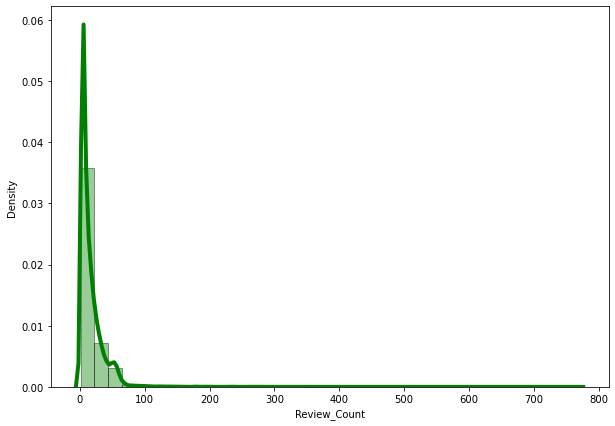

In [49]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(rating['Review_Count'], hist = True, kde = True,
            bins = int(180/5), color = 'green',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

### Character Counts

In [50]:
# Creating column for character counts in the review text
rating['Review_Char'] = rating['Review'].str.len()
rating[['Review_Char','Review']].head(10)

,Review_Char,Review
0,155,monts use zebronics bad watch condition waste ...
1,225,watch firstly thanks amazon day delivery watch...
2,202,watch best price segment compare brand battery...
3,95,nice sporty watch good hand look cool wear eve...
4,87,nice watch like fit watch lot sport mode easy ...
5,122,vey good smart watch good fitting feel expensi...
6,72,nice watch good fitting feel comfortable easy ...
7,89,smart watch cool watch easy use bright sunligh...
8,44,hand smart watch extra backup look like best
9,59,quality assure best best price range absolutel...


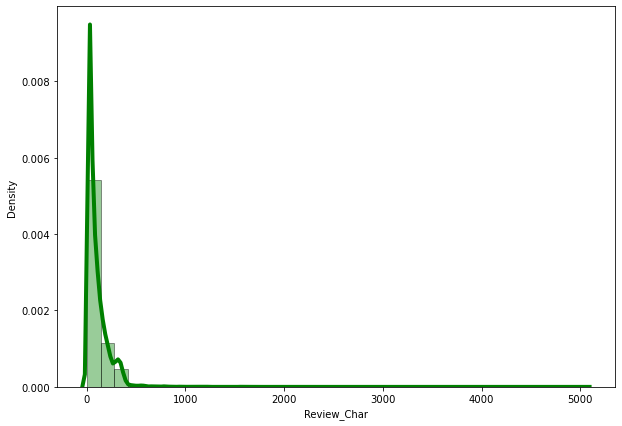

In [51]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(rating['Review_Char'], hist = True, kde = True,
            bins = int(180/5), color = 'green',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

# Removing Outliers

In [52]:
# Applying zscore to remove outliers
z_score = zscore(rating[['Review_Count']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
rating = rating[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(rating.shape[0], rating.shape[1]))

We have 48799 Rows and 6 Columns in our dataframe after removing outliers


## Plotting histograms for word count and character count again after removing the outliers

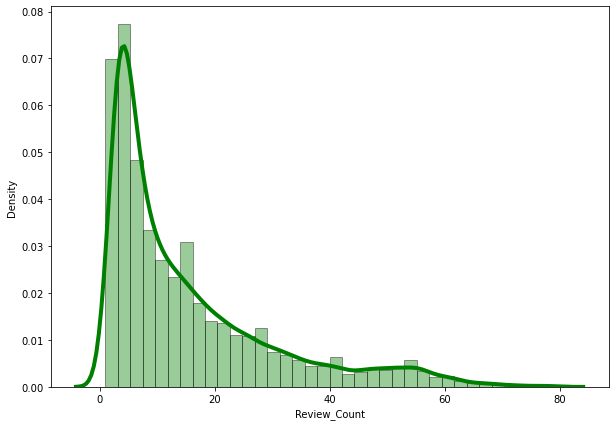

In [53]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(rating['Review_Count'], hist = True, kde = True,
            bins = int(180/5), color = 'green',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

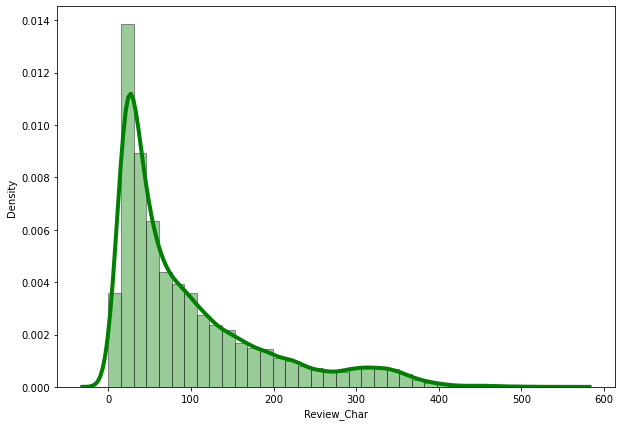

In [54]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(rating['Review_Char'], hist = True, kde = True,
            bins = int(180/5), color = 'green',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

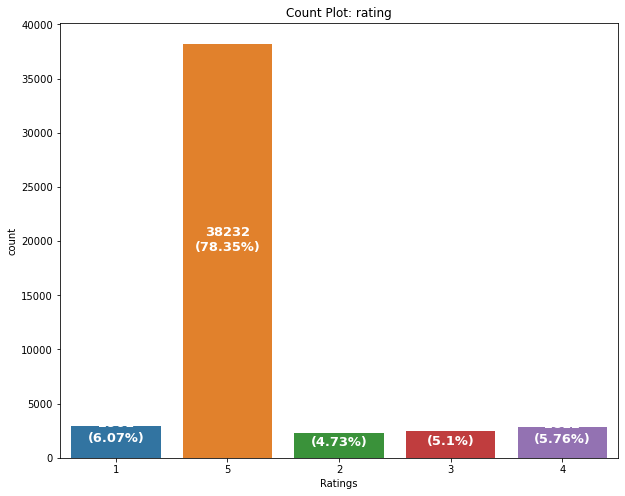

In [55]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=rating,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(rating),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

#### Observation:

- We can see that the highest number of customer rating received are for 5 stars then 4 star rating reviews present .
- Then 1 star rating is highest compared to 2 and 3 star rating reviews

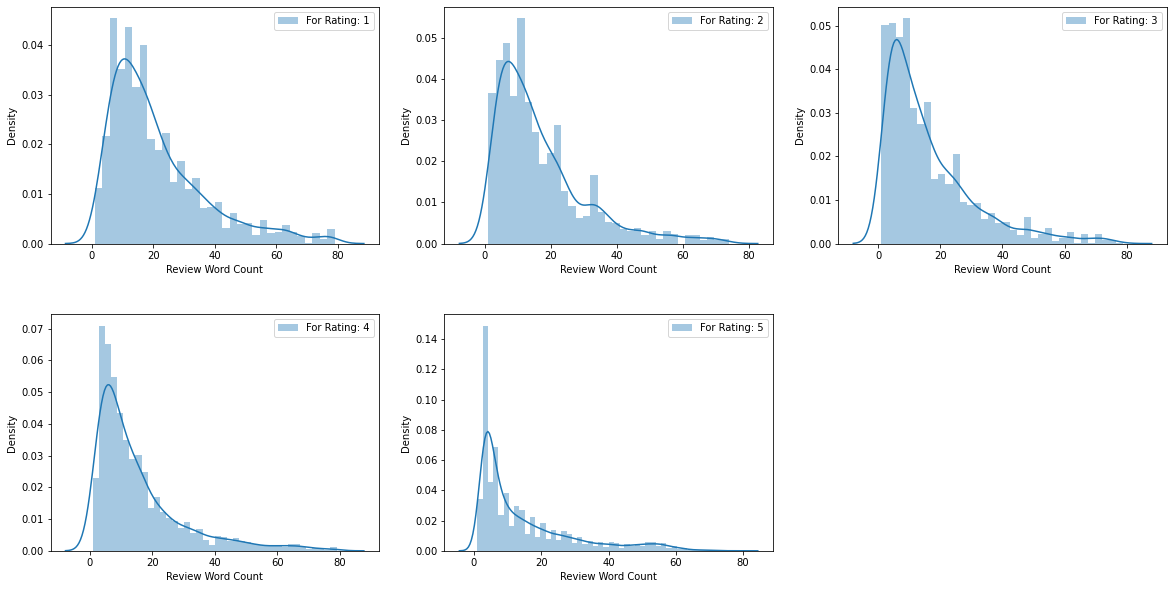

In [56]:
# Checking review word count distribution for each rating
ratings = np.sort(rating.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(rating.Review_Count[rating.Ratings==i], ax=axis, label=f"For Rating: {i}")
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

#### Observation: 
    The above word count histogram+distributions for each and every rating shows that when people are disappointed with a   service they tend to mention a discriptive review as compared to when they are happy they use lesser words to express     the joy of having got a great product.

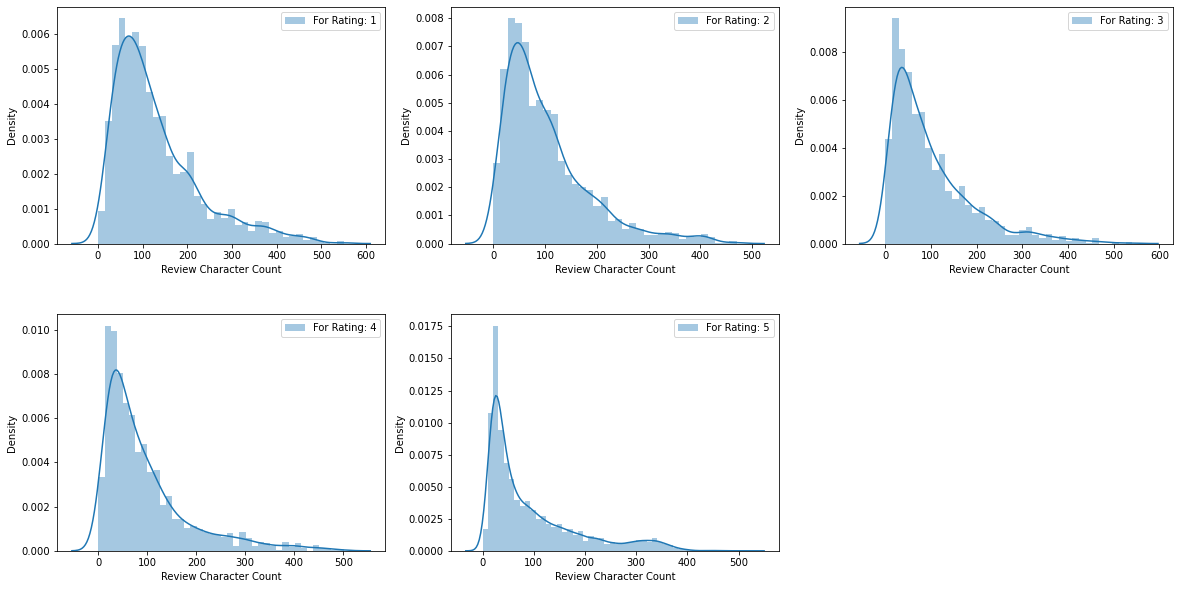

In [57]:
# Checking review character count distribution for each rating
ratings = np.sort(rating.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(rating.Review_Char[rating.Ratings==i], ax=axis, label=f"For Rating: {i}")
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

#### Observation: 
    Just as in the case of word count histogram+distribution plots the pattern is quite evident that Rating 5 reviews have    lesser character counts on their comments when compared to the lower rating details.

### Displaying loud words with Word Cloud information

In [58]:
from wordcloud import WordCloud

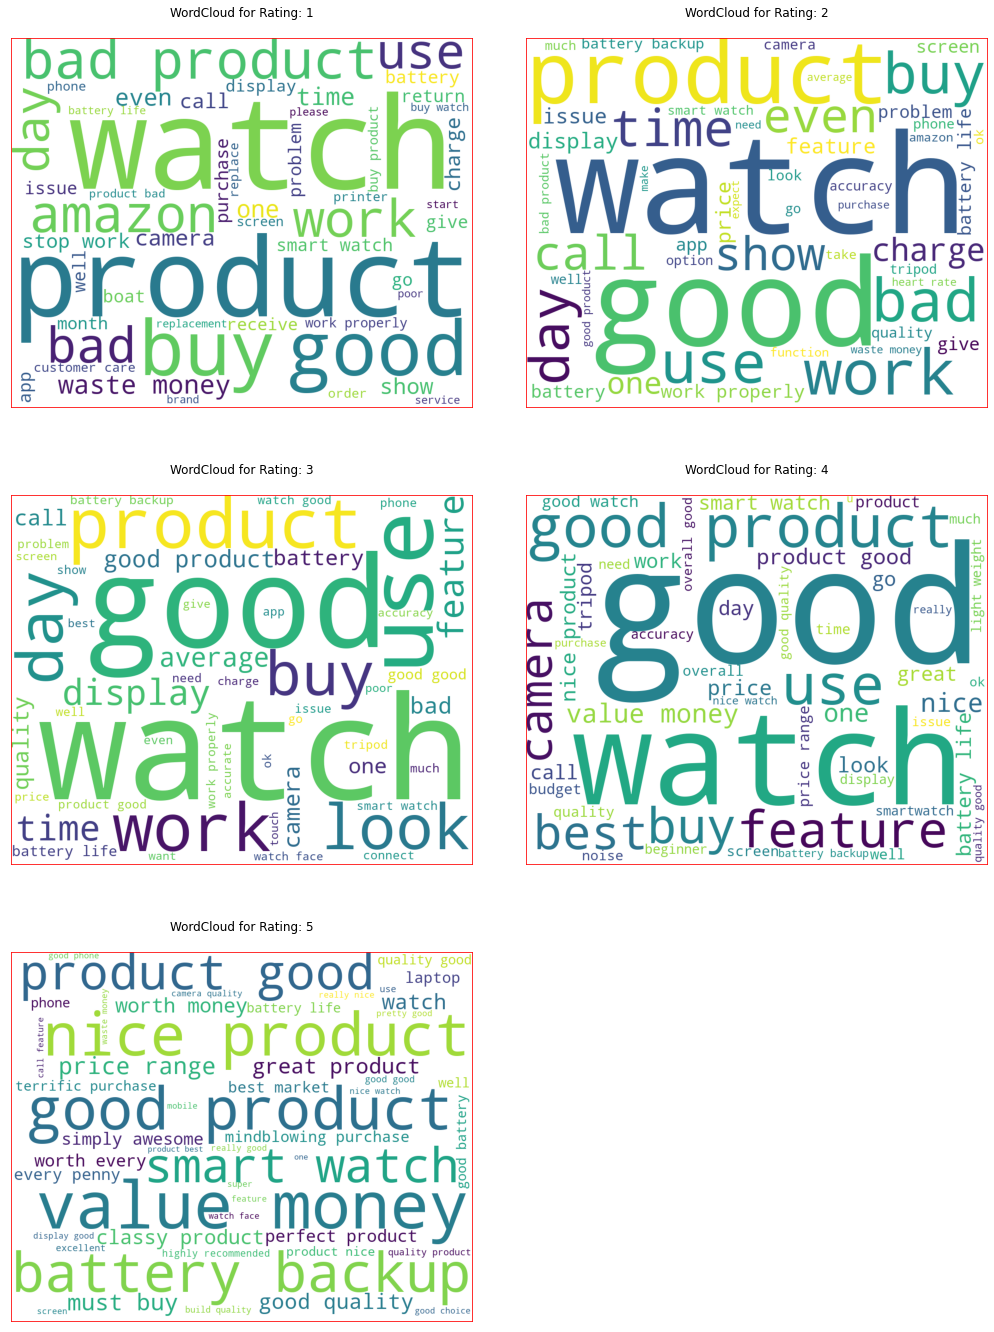

In [59]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(rating.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(rating.Review[rating.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

#### Observation:

- For Rating: 1

It mostly consists of words like watch, use, bad product, waste, time, money, bad experience, issue etc

- For Rating: 2

It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc

- For Rating: 3

It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc

- For Rating: 4

It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc

- For Rating: 5

It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc

5    38232
1     2961
4     2812
3     2487
2     2307
Name: Ratings, dtype: int64


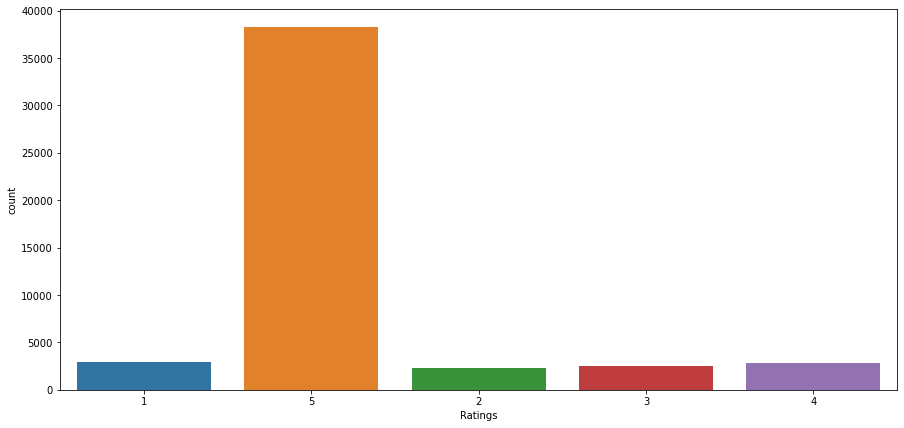

In [60]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(rating['Ratings'])
print(rating.Ratings.value_counts())
plt.show()

#### Observation:

- Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.
- Which will cause the Imbalance problem for our Machine Learning model and make it bias.
- So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
- For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart)
- Then I will select equal number of data of every category and ensure that the rating values are balanced

In [61]:
# shuffling the entire data set
rating = rating.sample(frac=1).reset_index(drop=True)
rating

,Review_title,Review_text,Ratings,Review,Review_Count,Review_Char
0,Absolute rubbish!,never buy laptops in flipkart they will bluff ...,5,absolute rubbish never buy laptop flipkart blu...,16,109
1,Wonderful,top notch quality!!!,5,wonderful top notch quality,4,27
2,Worth every penny,one of the best product highly recommend this ...,5,worth every penny one best product highly reco...,11,79
3,Delightful,Budget monitor with best visual experience. An...,5,delightful budget monitor best visual experien...,43,290
4,Does the job,In my opinion POCO has been spamming the marke...,5,job opinion poco spamming market subtier produ...,37,223
...,...,...,...,...,...,...
48794,Best for mid range price,Nice and good model from canon for beginners a...,5,best mid range price nice good model canon beg...,14,80
48795,"Worst cheap Chinese products,Bought two watche...","Battery life,Charging cable,Charging point<br>...",5,bad cheap chinese productsbought two watch las...,19,152
48796,Terrific,Brilliant watch 😘😘,5,terrific brilliant watch,3,24
48797,Very Good,Best phone under this price segement....\nBatt...,5,good best phone price segement battery backup ...,13,90


### Top 30 most frequently occuring words

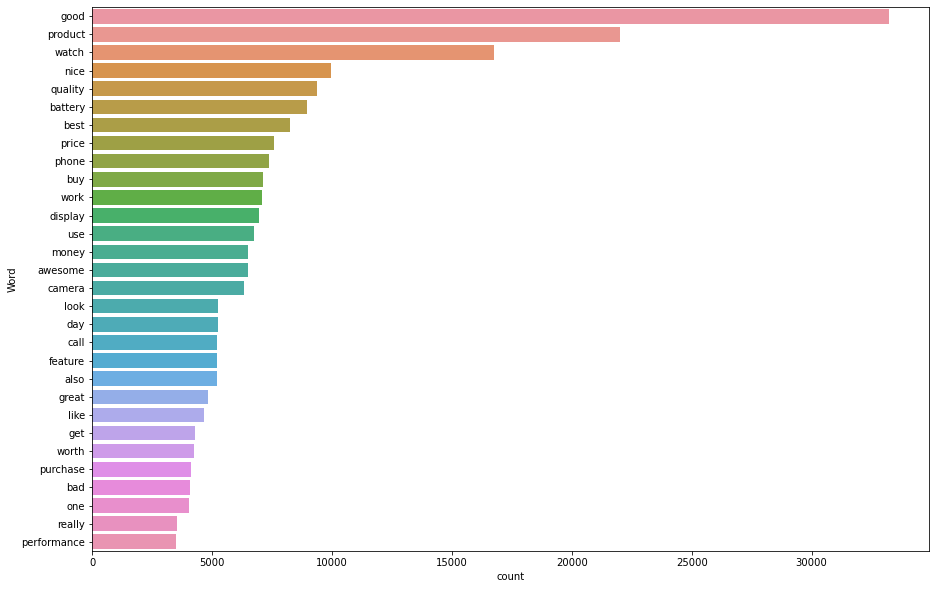

In [52]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(rating['Review'])    

### Top 30 rarely occuring words

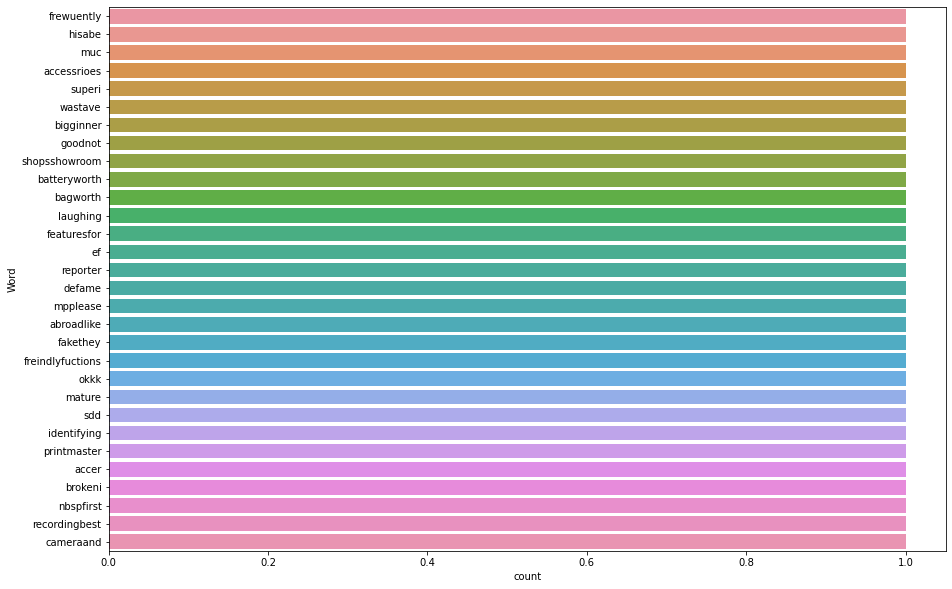

In [53]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(rating['Review'])   

# Model Building and Evaluation Metrics

In [54]:
# Separating features and labels here
x = rating['Review']
y = rating['Ratings']

### Converting text into vectors using TfidfVectorizer

In [55]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

## Splitting the data into train and test datasets

In [56]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (34159, 150000)
x_test (14640, 150000)
y_train (34159,)
y_test (14640,)


In [64]:
import lightgbm 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier

In [68]:
# Defining the Classification Machine Learning Algorithms
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier(verbosity=0)

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

### Training and testing of all the classification algorithms

In [71]:
for model in [lr,svc,bnb,mnb,sgd,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 77.56147540983606
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.71      0.77      0.74      1791
           2       0.66      0.47      0.55       865
           3       0.69      0.53      0.60      1335
           4       0.71      0.63      0.67      2885
           5       0.83      0.91      0.87      7764

    accuracy                           0.78     14640
   macro avg       0.72      0.66      0.68     14640
weighted avg       0.77      0.78      0.77     14640

CONFUSION MATRIX: 
 [[1375   85   57   66  208]
 [ 202  404   90   70   99]
 [ 113   59  706  173  284]
 [  72   35   87 1827  864]
 [ 170   31   88  432 7043]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURAC

## Cross validation score for best score models

In [72]:
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,bnb,mnb,sgd,lgb]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 77.24134218455275


******************************LinearSVC******************************
Cross validation score: 78.73931874673873


******************************BernoulliNB******************************
Cross validation score: 68.6878910686223


******************************MultinomialNB******************************
Cross validation score: 67.35179882864419


******************************SGDClassifier******************************
Cross validation score: 76.77206871913532


******************************LGBMClassifier******************************
Cross validation score: 77.45651052834704




# HyperParameter Tuning

## Linear SVC with GridSearchCV

In [73]:
# Lets select the different parameters for tuning our best model (Linear SVC)
grid_params =  {'C':(0.001, 0.01, 0.1, 1, 10),
                   'penalty':('l1','l2'),
                  'loss':('hinge','squared_hinge')}

# Train the model with given parameters using GridSearchCV
LSVC =  GridSearchCV(svc, grid_params, cv=3)
LSVC.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10),
                         'loss': ('hinge', 'squared_hinge'),
                         'penalty': ('l1', 'l2')})

In [74]:
LSVC.best_params_ # Selecting the best parameters found by GridSearchCV

{'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [78]:
# Final Model with the best chosen parameters list
best_model = LinearSVC(C= 1, loss= 'squared_hinge', penalty= 'l2')
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 79.43989071038251

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.76      0.77      0.76      1791
           2       0.63      0.56      0.59       865
           3       0.70      0.59      0.64      1335
           4       0.72      0.69      0.70      2885
           5       0.86      0.90      0.88      7764

    accuracy                           0.79     14640
   macro avg       0.73      0.70      0.72     14640
weighted avg       0.79      0.79      0.79     14640


CONFUSION MATRIX: 
 [[1371  103   50   69  198]
 [ 152  481   89   68   75]
 [  85   76  794  165  215]
 [  58   49  104 1988  686]
 [ 148   49   95  476 6996]]


In [85]:
import scikitplot as skplt

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

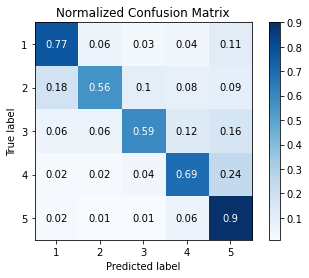

In [86]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

### Saving the best model

In [89]:
import joblib

In [90]:
joblib.dump(best_model, "Rating_Prediction_Model.pkl")

['Rating_Prediction_Model.pkl']

### Loading the final model

In [91]:
Model = joblib.load("Rating_Prediction_Model.pkl")

In [92]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
Rating_Prediction_Model = pd.DataFrame()
Rating_Prediction_Model['Predicted Ratings Review'] = prediction
Rating_Prediction_Model['Actual Ratings Review'] = y
Rating_Prediction_Model

,Predicted Ratings Review,Actual Ratings Review
0,5,1
1,4,4
2,5,5
3,1,4
4,5,5
...,...,...
14635,5,4
14636,5,2
14637,2,4
14638,4,5


In [94]:
# Converting the dataframe into CSV format and saving it
Rating_Prediction_Model.to_csv('Rating_Prediction_Model.csv', index=False)

#### Final Remarks:

After applying the hyper parameter tuning the best accuracy score obtained was 79.43989071038251% which can be further improved by obtaining more data and working up through other parameter combinations.